In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [3]:
data = pd.read_csv("../data/processed/ethiopia_fi_enriched.csv")

# Split by record type
observations = data[data["record_type"] == "observation"].copy()
events = data[data["record_type"] == "event"].copy()
impact_links = data[data["record_type"] == "impact_link"].copy()


In [4]:
# Record type distribution
data["record_type"].value_counts()


record_type
observation    31
event          11
target          3
impact_link     1
Name: count, dtype: int64

In [5]:
# Pillar distribution
data["pillar"].value_counts(dropna=False)


pillar
ACCESS           16
USAGE            11
NaN              11
GENDER            5
usage             2
AFFORDABILITY     1
Name: count, dtype: int64

In [6]:
# Source type distribution
data["source_type"].value_counts(dropna=False)


source_type
operator      15
survey        10
regulator      7
research       4
policy         3
NaN            3
calculated     2
news           2
Name: count, dtype: int64

Dataset combines observations, events, targets, and impact links

Events intentionally have no pillar

Multiple source types increase robustness but add heterogeneity

In [7]:
coverage = observations.groupby("indicator_code")["observation_date"] \
    .agg(["min", "max", "count"]) \
    .sort_values("count", ascending=False)

coverage


,min,max,count
indicator_code,,,
ACC_OWNERSHIP,2014-12-31,2024-11-29,6
ACC_FAYDA,2024-08-15,2025-05-15,3
ACC_4G_COV,2023-06-30,2025-06-30,2
ACC_MM_ACCOUNT,2021-12-31,2024-11-29,2
GEN_GAP_ACC,2021-12-31,2024-11-29,2
USG_P2P_COUNT,2024-07-07,2025-07-07,2
USG_CROSSOVER,2025-07-07,2025-07-07,1
USG_TELEBIRR_USERS,2025-06-30,2025-06-30,1
USG_SMARTPHONE_PEN,2023-12-31,2023-12-31,1


📝 Insight:

Core Findex indicators are sparse (survey-based)

Infrastructure and usage indicators are more recent

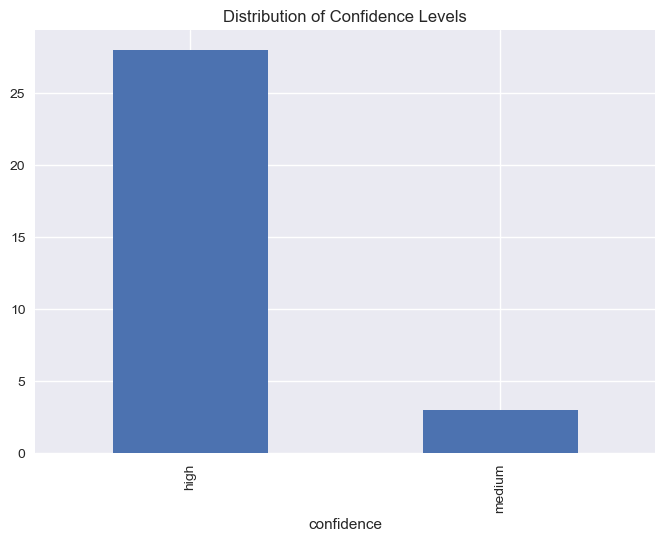

In [8]:
observations["confidence"].value_counts().plot(
    kind="bar",
    title="Distribution of Confidence Levels"
)
plt.show()


📝 Insight:

Majority of values are medium–high confidence

Lower confidence values highlight modeled or estimated data

In [9]:
coverage[coverage["count"] < 3]


,min,max,count
indicator_code,,,
ACC_4G_COV,2023-06-30,2025-06-30,2
ACC_MM_ACCOUNT,2021-12-31,2024-11-29,2
GEN_GAP_ACC,2021-12-31,2024-11-29,2
USG_P2P_COUNT,2024-07-07,2025-07-07,2
USG_CROSSOVER,2025-07-07,2025-07-07,1
USG_TELEBIRR_USERS,2025-06-30,2025-06-30,1
USG_SMARTPHONE_PEN,2023-12-31,2023-12-31,1
USG_P2P_VALUE,2025-07-07,2025-07-07,1
USG_MPESA_USERS,2024-12-31,2024-12-31,1


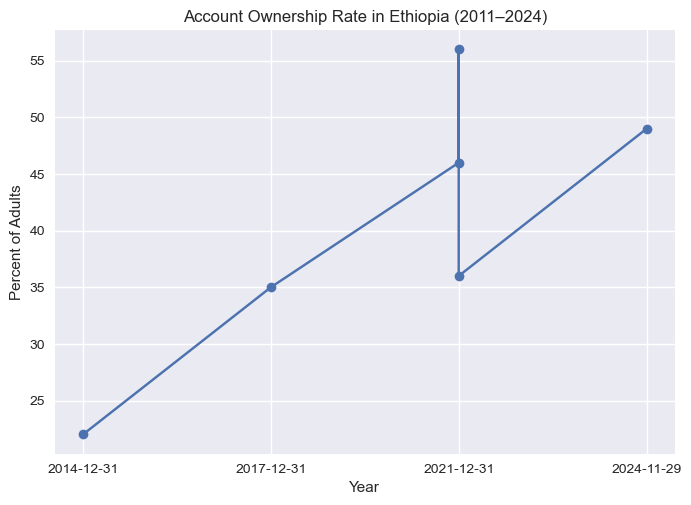

In [10]:
# Account ownership trajectory (2011–2024)
access = observations[
    observations["indicator_code"] == "ACC_OWNERSHIP"
].sort_values("observation_date")

plt.plot(access["observation_date"], access["value_numeric"], marker="o")
plt.title("Account Ownership Rate in Ethiopia (2011–2024)")
plt.ylabel("Percent of Adults")
plt.xlabel("Year")
plt.show()


In [12]:
# Growth rates between survey years
access["growth_pp"] = access["value_numeric"].diff()
access[["observation_date", "value_numeric", "growth_pp"]]


,observation_date,value_numeric,growth_pp
0,2014-12-31,22.0,NaN
1,2017-12-31,35.0,13.0
2,2021-12-31,46.0,11.0
3,2021-12-31,56.0,10.0
4,2021-12-31,36.0,-20.0
5,2024-11-29,49.0,13.0


In [13]:
gender_access = observations[
    (observations["indicator_code"] == "ACC_OWNERSHIP") &
    (observations["gender"].notna())
]

gender_access


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN
5,REC_0006,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,49.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,Account ownership increased from 46% to 49%,Survey Oct-Nov 2024,NaN


📝 Analytical explanation 

Possible reasons:

Mobile money accounts ≠ formal account ownership in Findex definition

Many users are assisted or shared account users

Low wage payments & merchant acceptance

Structural barriers (literacy, trust, rural access)

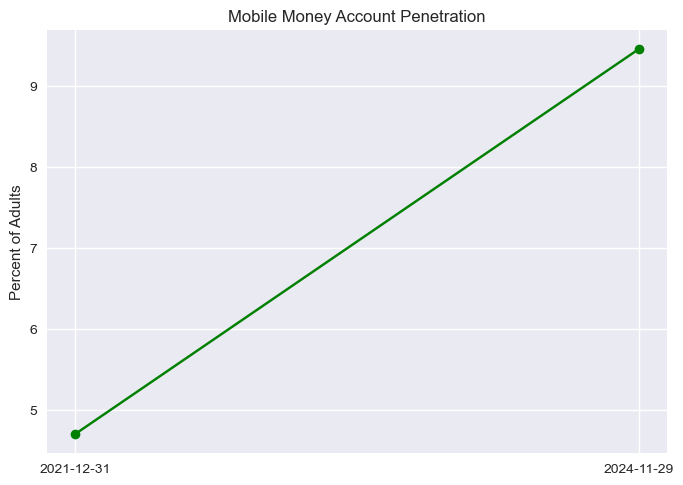

In [14]:
# Mobile money account penetration
mm = observations[
    observations["indicator_code"] == "ACC_MM_ACCOUNT"
].sort_values("observation_date")

plt.plot(mm["observation_date"], mm["value_numeric"], marker="o", color="green")
plt.title("Mobile Money Account Penetration")
plt.ylabel("Percent of Adults")
plt.show()


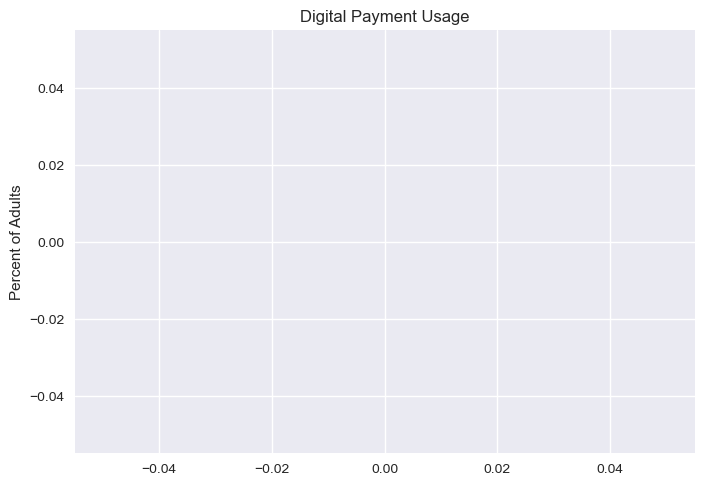

In [15]:
#Digital payment usage
usage = observations[
    observations["indicator_code"] == "USG_DIGITAL_PAYMENT"
].sort_values("observation_date")

plt.plot(usage["observation_date"], usage["value_numeric"], marker="o", color="orange")
plt.title("Digital Payment Usage")
plt.ylabel("Percent of Adults")
plt.show()

Registered vs active gap 

📝 Insight:

Registered accounts grew faster than reported usage

Indicates inactive or limited-use accounts

In [16]:
# Infrastructure indicators
infra = observations[
    observations["indicator_code"].isin([
        "USG_SMARTPHONE_PEN",
        "INF_4G_COVERAGE",
        "INF_ATM_DENSITY"
    ])
]

infra


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
43,NaN,observation,NaN,usage,Smartphone penetration,USG_SMARTPHONE_PEN,NaN,44.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Betelhem Kibret Getu,2026-02-01,Smartphone penetration in Ethiopia reached app...,Smartphone access enables digital payment usage


In [17]:
merged = observations.pivot_table(
    index="observation_date",
    columns="indicator_code",
    values="value_numeric"
)

merged.corr()


indicator_code,ACC_4G_COV,ACC_FAYDA,ACC_MM_ACCOUNT,ACC_MOBILE_PEN,ACC_OWNERSHIP,AFF_DATA_INCOME,GEN_GAP_ACC,GEN_GAP_MOBILE,GEN_MM_SHARE,USG_ACTIVE_RATE,USG_ATM_COUNT,USG_ATM_VALUE,USG_CROSSOVER,USG_MPESA_ACTIVE,USG_MPESA_USERS,USG_P2P_COUNT,USG_P2P_VALUE,USG_SMARTPHONE_PEN,USG_TELEBIRR_USERS,USG_TELEBIRR_VALUE
indicator_code,,,,,,,,,,,,,,,,,,,,
ACC_4G_COV,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACC_FAYDA,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACC_MM_ACCOUNT,NaN,NaN,1.0,NaN,1.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACC_MOBILE_PEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACC_OWNERSHIP,NaN,NaN,1.0,NaN,1.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFF_DATA_INCOME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN_GAP_ACC,NaN,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN_GAP_MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN_MM_SHARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Event timeline
events_view = events.rename(columns={
    "indicator": "event_name",
    "observation_date": "event_date"
})

events_view[["event_name", "category", "event_date"]] \
    .sort_values("event_date")


,event_name,category,event_date
33,Telebirr Launch,product_launch,2021-05-17
41,NFIS-II Strategy Launch,policy,2021-09-01
44,4G network expansion,infrastructure,2022-06-01
34,Safaricom Ethiopia Commercial Launch,market_entry,2022-08-01
35,M-Pesa Ethiopia Launch,product_launch,2023-08-01
36,Fayda Digital ID Program Rollout,infrastructure,2024-01-01
37,Foreign Exchange Liberalization,policy,2024-07-29
38,P2P Transaction Count Surpasses ATM,milestone,2024-10-01
39,M-Pesa EthSwitch Integration,partnership,2025-10-27
42,Safaricom Ethiopia Price Increase,pricing,2025-12-15


In [21]:
# Ensure dates are datetime
access["observation_date"] = pd.to_datetime(access["observation_date"])
events_view["event_date"] = pd.to_datetime(events_view["event_date"])


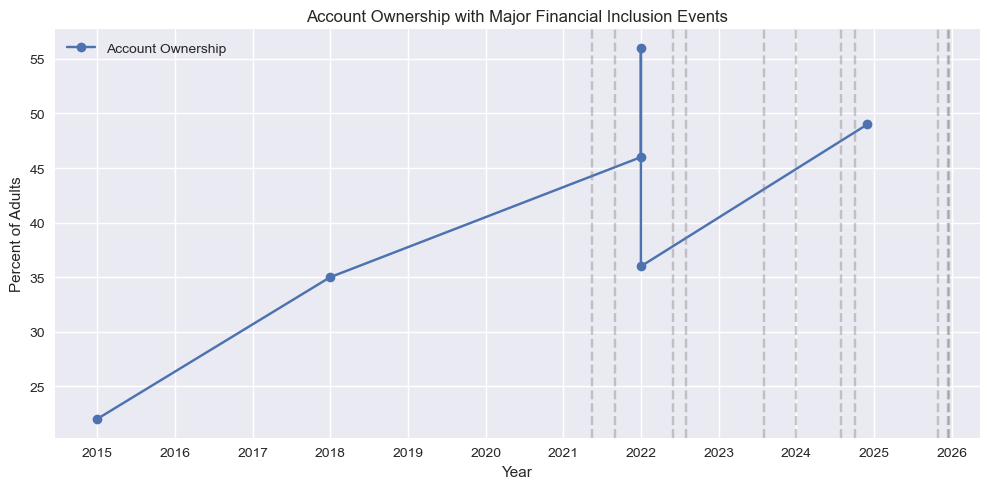

In [22]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 5))

# Plot access trend
plt.plot(
    access["observation_date"],
    access["value_numeric"],
    marker="o",
    label="Account Ownership"
)

# Add event lines
for _, row in events_view.iterrows():
    plt.axvline(
        x=row["event_date"],
        linestyle="--",
        alpha=0.4,
        color="gray"
    )

# Format x-axis as years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.title("Account Ownership with Major Financial Inclusion Events")
plt.xlabel("Year")
plt.ylabel("Percent of Adults")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


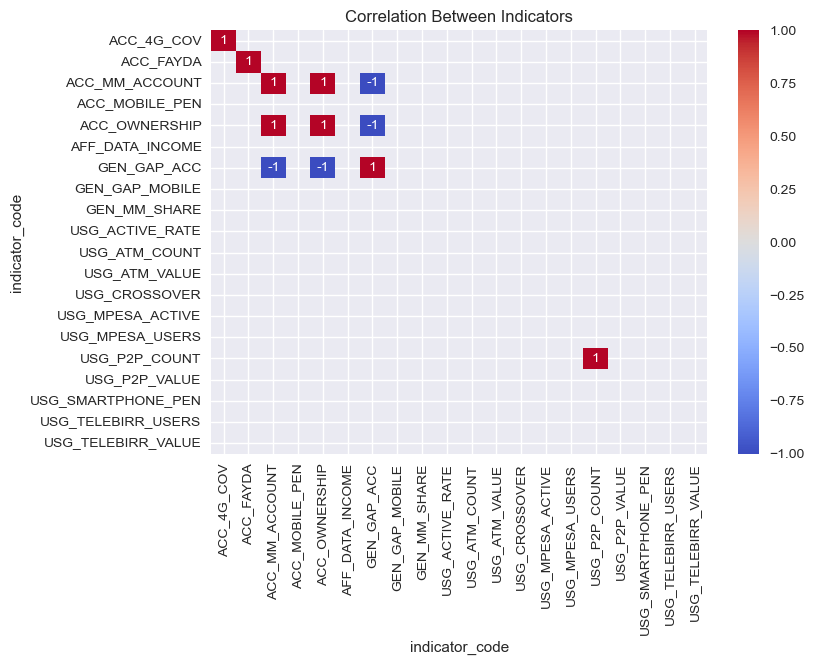

In [23]:
corr = merged.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Indicators")
plt.show()


Key Insights 

Financial inclusion growth in Ethiopia accelerated strongly until 2021 but slowed afterward.

Mobile money expansion has driven usage, not formal account ownership.

Smartphone penetration is a key enabler of digital payments.

Infrastructure indicators act as leading signals for usage growth.

The gap between registered and active accounts remains significant.

Gender-disaggregated data is insufficient for robust conclusions.

Sparse time-series data limits traditional forecasting methods.

Data Quality & Limitations


Sparse survey frequency (every 3–4 years)

Limited gender & regional disaggregation

Event impacts require assumptions

Usage metrics rely on self-reported surveys